# Assignment:

1. Perform some movie recommendations and analysis for user 2:
- How many movies has this user watched?
- Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.
    - Hint: the `sort_index()` function from pandas might be helpful to make the bar plot look nicer.
- What are some of user 2's top movies?
    - Hint: to get the actual movie titles, you can use pandas [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function, although using the movie IDs is OK too.
- Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
- Recommend a few movies for user 2 using similarity metrics.
- Do the recommendations from this method make sense?
- Write a short analysis of the results, and justify which similarity metric(s) you used.

Optional challenges:
- Perform other analyses (e.g. EDA, visualizations) of the movies watched from this dataset, or from a bigger part of the dataset for the movielens dataset: https://grouplens.org/datasets/movielens/
- Add yourself as a user in the data with ratings for movies you've watched, and find recommendations for next movies to watch. 
- Use a more advanced collaborative or content-based recommender to make recommendations (e.g. using the surprise package in Python)
    - Try making predictions for user 2. How do they compare with our basic model?
    - Add your own movie ratings, or use another recommender dataset and add your own preferences, then get recommendations for yourself

In [24]:
'''
Read in our data
'''

import pandas as pd

df_movie = pd.read_csv('movies.csv')
df_rating = pd.read_csv('ratings.csv')

df_movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [25]:
df_rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [26]:
'''
Finding out how many movies user 2 has watched/rated
The user has rated 29 movies.
'''

df_user2 = df_rating.loc[df_rating['userId'] == 2]
len(df_user2)

29

/var/folders/_c/phkzhjtn69l3lcd6q2xrxh8h0000gn/T/ipykernel_70738/3541933858.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user2.sort_values(by = 'rating', inplace=True)


<Axes: xlabel='rating'>

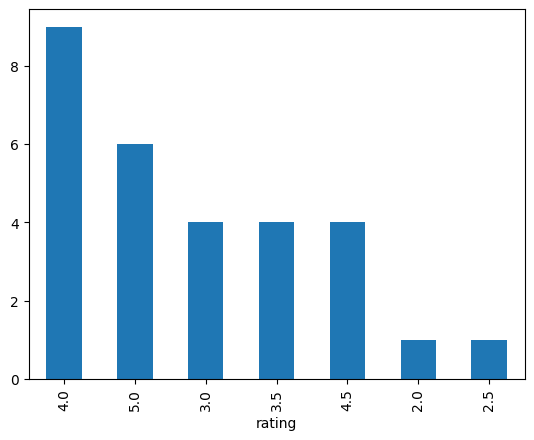

In [27]:
'''
Let's make a bar chart of the amount of times user 2 has given a movie
a certain rating
'''

df_user2.sort_values(by = 'rating', inplace=True)
df_user2['rating'].value_counts().plot.bar()

In [28]:
'''
Let's look at some of user2's 5 star movies
First let's merge our two dataframes.
'''

df = df_rating.merge(df_movie, on = 'movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [29]:
'''
Then let's again get only the rows with user 2
'''

df_user2 = df.loc[df['userId'] == 2]
df_user2.head()

,userId,movieId,rating,timestamp,title,genres
2267,2,333,4.0,1445715029,Tommy Boy (1995),Comedy
15657,2,3578,4.0,1445714885,Gladiator (2000),Action|Adventure|Drama
16296,2,318,3.0,1445714835,"Shawshank Redemption, The (1994)",Crime|Drama
16613,2,1704,4.5,1445715228,Good Will Hunting (1997),Drama|Romance
16754,2,6874,4.0,1445714952,Kill Bill: Vol. 1 (2003),Action|Crime|Thriller


In [30]:
'''
Then we want only the movies that the user gave a 5 star rating
We see that their five star movies are:
Step Brothers
Inside Job
Warrior
The Wolf of Wall Street 
Mad Max: Fury Road
The Jinx: The Life and Deaths of Robert Durst
'''

df_user2.loc[df_user2['rating']==5.0]

,userId,movieId,rating,timestamp,title,genres
17213,2,60756,5.0,1445714980,Step Brothers (2008),Comedy
17627,2,80906,5.0,1445715172,Inside Job (2010),Documentary
17648,2,89774,5.0,1445715189,Warrior (2011),Drama
17848,2,106782,5.0,1445714966,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama
18044,2,122882,5.0,1445715272,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller
18091,2,131724,5.0,1445714851,The Jinx: The Life and Deaths of Robert Durst ...,Documentary


In [31]:
'''
Let's find the two user's closest to user 2 in terms of movie choice
We can use a cosine and a euclidean distance
First, we create a dataframe with the userId as the rows and the movieId
as the columns with the ratings filled in.

We have many missing values, so we will fill them with a -1
'''

from scipy.spatial.distance import euclidean

wide = df.pivot(index='userId', columns='movieId', values='rating')
wide.fillna(-1, inplace=True)
wide.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,-1.0,4.0,-1.0,-1.0,4.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [32]:
'''
Now we get the euclidean score for all of our datapoints
'''

from scipy.spatial.distance import pdist, squareform

euclidean = squareform(pdist(wide, metric=euclidean))
df_euclidean = pd.DataFrame(data=euclidean, columns=wide.index, index=wide.index)
df_euclidean.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,86.239492,84.731930,96.979379,84.516271,108.083301,91.651514,84.380092,86.203248,96.969067,...,95.430603,90.288427,147.939177,91.350972,96.224997,165.230143,90.862534,126.232920,84.279298,179.904836
2,86.239492,0.000000,36.806929,74.567084,41.039615,84.777650,60.172668,41.318882,40.450587,57.295288,...,55.859198,58.423026,145.090489,52.822817,69.235107,158.923724,71.674612,124.893955,37.016888,171.373860
3,84.731930,36.806929,0.000000,73.908727,39.956226,84.584277,60.112395,40.441316,39.172695,58.150666,...,59.895743,57.701820,144.296570,51.850747,68.233057,158.848985,70.664701,124.946989,36.173194,172.971819
4,96.979379,74.567084,73.908727,0.000000,72.608539,101.847926,83.330667,74.639132,75.591005,85.743804,...,84.604964,81.455509,137.952891,81.018516,90.461318,158.726179,89.693924,131.524713,73.593478,178.462181
5,84.516271,41.039615,39.956226,72.608539,0.000000,77.479029,59.958319,33.837849,43.543082,60.274373,...,61.253571,48.383882,142.762040,47.833043,66.740168,157.171880,69.188149,122.697799,35.270384,172.935682


In [33]:
'''
Now we look at all of the scores related to user 2.
We see that user 442 has the shortest euclidean distance!
Some other close users are 461, 189, and 508.
'''

df_euclidean.loc[2].sort_values()

userId
2        0.000000
442     29.000000
461     30.495901
189     30.809901
508     31.488093
          ...    
448    171.200175
610    171.373860
599    185.184368
474    206.630709
414    232.408046
Name: 2, Length: 610, dtype: float64

In [34]:
'''
Now let's do the same but with the cosine distance
'''

cosine = squareform(pdist(wide, metric='cosine'))
df_cosine = pd.DataFrame(data=cosine, columns=wide.index, index=wide.index)
df_cosine.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.297820,0.287596,0.351641,0.284578,0.424172,0.325947,0.283508,0.297012,0.367191,...,0.351630,0.317624,0.604000,0.328982,0.354062,0.704825,0.310711,0.492753,0.284335,0.774839
2,0.297820,0.000000,0.066901,0.239743,0.082261,0.297203,0.166283,0.083310,0.080182,0.151920,...,0.141293,0.158107,0.637488,0.132006,0.214459,0.712016,0.223966,0.534940,0.067643,0.762312
3,0.287596,0.066901,0.000000,0.235964,0.078257,0.296470,0.166386,0.080095,0.075480,0.156956,...,0.163181,0.154612,0.631028,0.127545,0.208735,0.712729,0.218059,0.536596,0.064865,0.780489
4,0.351641,0.239743,0.235964,0.000000,0.226149,0.397426,0.288046,0.239146,0.245999,0.306657,...,0.294808,0.276698,0.539371,0.277381,0.333232,0.669528,0.321761,0.557756,0.233855,0.787540
5,0.284578,0.082261,0.078257,0.226149,0.000000,0.245799,0.164334,0.055515,0.092285,0.167458,...,0.169619,0.107608,0.612848,0.107614,0.198208,0.691993,0.207570,0.513040,0.060947,0.775858


In [35]:
'''
And now we find the person with the smallest cosine distance
We once again get user 442 as the closest user to user 2.

Other user's are 461, 189, and 508, which is also identical to 
our euclidean results, giving us a confident answer to who is
most similar to user 2.
'''

df_cosine[2].sort_values()


userId
2      0.000000
442    0.042025
461    0.046059
189    0.046957
508    0.049443
         ...   
610    0.762312
448    0.817785
599    0.936812
474    0.975777
414    1.084648
Name: 2, Length: 610, dtype: float64

In [36]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [37]:
'''
Lastly, let's find what movies user 442 has watched that user 2 hasn't.
These will be the movies that we will recommend to user 2.
'''

user2_movies = df[(df['userId']==2) & (df['rating'].notna())]['movieId']
user442_movies = df[(df['userId']==442) & (df['rating'].notna())]

recommend = user442_movies[~user442_movies['movieId'].isin(user2_movies)]
recommend.sort_values(by='rating', inplace=True, ascending=False)
recommend


,userId,movieId,rating,timestamp,title,genres
2779,442,362,2.5,1331560498,"Jungle Book, The (1994)",Adventure|Children|Romance
77218,442,4361,2.5,1331560492,Tootsie (1982),Comedy|Romance
64193,442,3752,2.0,1331560582,"Me, Myself & Irene (2000)",Adventure|Comedy
22546,442,2145,2.0,1331560550,Pretty in Pink (1986),Comedy|Drama|Romance
32743,442,524,2.0,1331560506,Rudy (1993),Drama
71782,442,2908,2.0,1331560472,Boys Don't Cry (1999),Drama
32318,442,468,1.5,1331560538,Englishman Who Went Up a Hill But Came Down a ...,Comedy|Romance
33027,442,616,1.5,1331560512,"Aristocats, The (1970)",Animation|Children
74217,442,3363,1.5,1331560564,American Graffiti (1973),Comedy|Drama
80761,442,2020,1.0,1331560570,Dangerous Liaisons (1988),Drama|Romance


Based off the results from above, a few movies we could recommend include:
Tootsie
The Jungle Book
Pretty in Pink
Boys Don't Cry
Me, Myself & Irene
Rudy

The problem with some of these recommendations are that the ratings given to them by user 442 is pretty low, with 2.5 stars being the highest rating.  Since user 442 and user 2 are so similar, they have already seen most of the same movies, so the only movies left that user 2 hasn't seen are movies that they wouldn't like anyways.

We can try getting some other movies from the top 4 users instead and see if we get better results.

In [38]:
'''
Let's add some more user's to get movies from that had similar taste to
user 2.
Users 461, 189, and 508 are the ones we will use.
'''

user2_movies = df[(df['userId']==2) & (df['rating'].notna())]['movieId']
user442_movies = df[(df['userId']==442) & (df['rating'].notna())]
user461_movies = df[(df['userId']==461) & (df['rating'].notna())]
user189_movies = df[(df['userId']==189) & (df['rating'].notna())]
user508_movies = df[(df['userId']==508) & (df['rating'].notna())]

similar_users = pd.concat([user442_movies, user461_movies, user189_movies,
                           user508_movies])
similar_users

,userId,movieId,rating,timestamp,title,genres
2779,442,362,2.5,1331560498,"Jungle Book, The (1994)",Adventure|Children|Romance
10096,442,1644,0.5,1331560575,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller
15400,442,3386,0.5,1331560586,JFK (1991),Drama|Mystery|Thriller
18392,442,1272,0.5,1331560460,Patton (1970),Drama|War
22546,442,2145,2.0,1331560550,Pretty in Pink (1986),Comedy|Drama|Romance
...,...,...,...,...,...,...
69964,508,1175,1.5,1268297518,Delicatessen (1991),Comedy|Drama|Romance
74767,508,307,1.0,1268297492,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
74832,508,562,2.5,1268297537,Welcome to the Dollhouse (1995),Comedy|Drama
79430,508,3148,1.0,1268297477,"Cider House Rules, The (1999)",Drama


In [39]:
'''
Getting the movies in our similar dataframe that are not in user 2's
movie ratings
'''

recommend = similar_users[~similar_users['movieId'].isin(user2_movies)]
recommend.sort_values(by='rating', inplace=True, ascending=False)
recommend

/var/folders/_c/phkzhjtn69l3lcd6q2xrxh8h0000gn/T/ipykernel_70738/1240975462.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommend.sort_values(by='rating', inplace=True, ascending=False)


,userId,movieId,rating,timestamp,title,genres
2670,461,356,5.0,1505935220,Forrest Gump (1994),Comedy|Drama|Romance|War
42355,189,68954,4.5,1439465136,Up (2009),Adventure|Animation|Children|Drama
3633,189,527,4.5,1439465064,Schindler's List (1993),Drama|War
34499,461,1784,4.5,1505935273,As Good as It Gets (1997),Comedy|Drama|Romance
8862,508,1270,4.5,1268298253,Back to the Future (1985),Adventure|Comedy|Sci-Fi
...,...,...,...,...,...,...
1758,461,260,0.5,1505935283,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
45037,442,3863,0.5,1331560522,"Cell, The (2000)",Drama|Horror|Thriller
18392,442,1272,0.5,1331560460,Patton (1970),Drama|War
71886,442,3107,0.5,1331560477,Backdraft (1991),Action|Drama


Based off these results, we can recommend some movies to user 2 that are much higher rated.  Some recommendations include.
Forest Gump
Up
Schindler's List
As Good as it Gets
Back to the Future

User 2's favorite movies were a mix of comedy, drama, and documentary.  The above movies also include comedy and drama (schindler's list could probably be labeld as documentary or at least historical fiction).

In [40]:
'''
Let's get a list of the movie that has the most 5 star ratings
'''

max_ratings = 0
movie_id = 0
for i in df['movieId']:
    five_star = len(df[(df['movieId'] == i) & (df['rating'] == 5.0)])
    if five_star > max_ratings: 
        max_ratings = five_star
        movie_id = i

print(max_ratings, movie_id)

153 318


In [41]:
'''
Movie with th most five star ratings
'''

top_movie = df[df['movieId'] == movie_id]
top_movie.iloc[0, 4]

'Shawshank Redemption, The (1994)'

In [42]:
'''
Let's look at another mmodel from the surprise module to build a recommender
system.
'''

#%pip install  scikit-surprise
from surprise import SVD
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

In [43]:
'''
Reading in our data
'''

reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)

data = Dataset.load_from_file('ratings.csv', reader=reader)

cross_validate(SVD(), data, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8736  0.8733  0.8746  0.8716  0.8702  0.8727  0.0016  
MAE (testset)     0.6689  0.6703  0.6704  0.6695  0.6714  0.6701  0.0008  
Fit time          0.21    0.22    0.21    0.21    0.21    0.21    0.01    
Test time         0.03    0.03    0.03    0.03    0.03    0.03    0.00    


{'test_rmse': array([0.87355905, 0.87332354, 0.87460418, 0.87159383, 0.87023844]),
 'test_mae': array([0.66889281, 0.67025982, 0.67044544, 0.66952859, 0.6713624 ]),
 'fit_time': (0.20513105392456055,
  0.22421622276306152,
  0.2058718204498291,
  0.2128310203552246,
  0.20915007591247559),
 'test_time': (0.026946067810058594,
  0.027638912200927734,
  0.027355194091796875,
  0.027124881744384766,
  0.027502775192260742)}

In [44]:
'''
Building our model
'''

training_data = data.build_full_trainset()
rec = SVD()
fitted = rec.fit(training_data)

In [45]:
'''
Now this function is used to return the top 10 recommendations for a 
specific user, in this case user 2.
'''

from collections import defaultdict

def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.
    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.
    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [46]:
'''
And now we print out the top 10 recommendations for user 2 in a neat
way.
The predictions have some different movies that our predictions from 
earlier.  Another nice thing about this system is that it gives us
the predicted rating for each movie.
'''

testset = training_data.build_anti_testset()
predictions = rec.test(testset)

top_n = get_top_n(predictions)

top_user_2 = pd.DataFrame(data=top_n['2'], columns=['movieId', 'predicted_rating'])
top_user_2['movieId'] = top_user_2['movieId'].astype('int')
top_user_2.set_index('movieId', inplace=True)

top_user_2.merge(df_movie, left_index=True, right_index=True)

,predicted_rating,movieId,title,genres
904,4.484982,1202,Withnail & I (1987),Comedy
1208,4.442907,1606,Kull the Conqueror (1997),Action|Adventure
1197,4.441400,1594,In the Company of Men (1997),Comedy|Drama
2959,4.422868,3967,Billy Elliot (2000),Drama
750,4.403430,984,"Pompatus of Love, The (1996)",Comedy|Drama
1199,4.377163,1597,Conspiracy Theory (1997),Drama|Mystery|Romance|Thriller
1089,4.376805,1414,Mother (1996),Comedy
1252,4.373704,1663,Stripes (1981),Comedy|War


# Analysis/Summary

For both parts of the assignment, write a short analysis and summary of what you did, the results, and the significance. Do this in a markdown cell here at the bottom, like this one.

We wanted to build a recommender system to recommend movies for user 2.  We started by merging our ratings and movies dataframes to get one dataframe with all the user's, their ratings, and the movies.  Then we looked at some data based on user 2, such as how many movies they have rated and some of their top ratings.  Next we ran a euclidean and cosine distance function on all of our user's and found the user's closest to user 2's tastes.  Lastly, we recommended some movies from this list that user 2 has not already seen.

We also looked at a built in recommender system in the surprise package.  We used it to get 10 recommendations for user 2 along with user 2's predicted score of each movie.  The results again make sense as the genres are similar to user 2's tastes.

Some extra stuff we could do is find user's that are close to user 2 but have also watched at least half of the same amount of movies.  The user's we found don't share many movies with user 2, which is a little strange.  We might get better results if we do that.